In [68]:
#libaries Ill be using for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import seaborn as sns
#NBA_API
from nba_api.stats.endpoints import playercareerstats, commonplayerinfo, shotchartdetail, teamgamelog, boxscoreadvancedv2, leaguedashplayerstats, leaguedashteamstats
from nba_api.stats.static import *

#Basketball Reference API
import sys
import os

sys.path.append('/Users/alexg/Documents/Documents - Alex/player_analysis/basketball_reference_web_scraper')
from basketball_reference_web_scraper import client


## Player Analysis 
- **Name**: Shai Gilgeous-Alexander 
- **Position**: PG / SG
- **Height**: 6'6 
- **Weight**: 195 lbs
- **College**: Kentucky
- **Draft Year**: 2018 (Round 1 pick 11)
- **Country**: Canada

## Introduction
This notebook provides a detailed analysis of Shai Gilgeous-Alexander's performance throughout his NBA career. We will examine each season individually and then compare his progress over the years.



In [73]:
#player info and player ID
player_id = players.find_players_by_full_name('shai gilgeous-alexander')[0]['id']
player_name = 'shai gilgeous-alexander'
player_info = commonplayerinfo.CommonPlayerInfo(player_id=player_id).get_data_frames()[0]

### 2018-19 Season
#### Overview
In this section, we will analyze Shai's rookie season.

In [3]:
#player career stats
data = playercareerstats.PlayerCareerStats(player_id=player_id).get_data_frames()[0]
data.describe()

,PLAYER_ID,TEAM_ID,PLAYER_AGE,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
count,6.0,6.000000e+00,6.000000,6.000000,6.000000,6.00000,6.000000,6.00000,6.000000,6.000000,...,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,1628983.0,1.610613e+09,22.500000,64.333333,62.833333,2115.50000,513.833333,1036.00000,0.492167,75.166667,...,0.834000,47.333333,258.000000,305.333333,312.666667,89.166667,48.833333,148.166667,146.666667,1468.333333
std,0.0,5.715476e+00,1.870829,16.741167,15.171245,507.55246,199.873377,359.82329,0.030486,18.004629,...,0.044222,17.037214,88.944927,99.502094,96.371503,41.392834,16.030180,28.902710,46.970913,605.499353
min,1628983.0,1.610613e+09,20.000000,35.000000,35.000000,1180.00000,287.000000,565.00000,0.453000,51.000000,...,0.800000,19.000000,147.000000,166.000000,207.000000,27.000000,23.000000,106.000000,70.000000,830.000000
25%,1628983.0,1.610613e+09,21.250000,59.000000,59.000000,2000.00000,375.000000,790.75000,0.472250,61.250000,...,0.807250,39.500000,191.500000,243.500000,241.500000,73.000000,45.250000,135.750000,123.250000,999.500000
50%,1628983.0,1.610613e+09,22.500000,69.000000,69.000000,2295.00000,477.500000,1033.50000,0.492000,79.000000,...,0.809000,52.000000,255.500000,303.500000,300.500000,87.500000,46.500000,147.500000,158.500000,1351.000000
75%,1628983.0,1.610613e+09,23.750000,73.750000,72.250000,2425.00000,647.500000,1298.75000,0.509500,88.500000,...,0.858000,58.500000,330.000000,391.250000,361.000000,108.000000,60.500000,160.000000,181.750000,1944.000000
max,1628983.0,1.610613e+09,25.000000,82.000000,75.000000,2553.00000,796.000000,1487.00000,0.535000,95.000000,...,0.905000,65.000000,365.000000,415.000000,465.000000,150.000000,67.000000,192.000000,192.000000,2254.000000


In [4]:
#Rookie year stats
first_year = data.loc[data['SEASON_ID'] == '2018-19']

#Team ID
clippers_id = '1610612746'
first_year_team_stats = teamgamelog.TeamGameLog(team_id=clippers_id, season='2018-19').get_data_frames()[0]
first_year_game_id = first_year_team_stats['Game_ID']

#check data
first_year

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,1628983,2018-19,00,1610612746,LAC,20.0,82,73,2174.0,341,...,0.8,57,175,232,270,96,45,141,175,889


In [16]:
first_year_totals = first_year.loc[:,['PTS','REB','AST','STL','BLK','GP','MIN']]
def calculate_per_game_totals(totals):
    per_game_stats = {
        'PPG': (totals['PTS'][0] / totals['GP'][0]).round(2),
        'RPG': (totals['REB'][0] / totals['GP'][0]).round(2),
        'APG': (totals['AST'][0] / totals['GP'][0]).round(2),
        'SPG': (totals['STL'][0] / totals['GP'][0]).round(2),
        'BPG': (totals['BLK'][0] / totals['GP'][0]).round(2),
        'MPG': (totals['MIN'][0] / totals['GP'][0]).round(1)
    }
    return per_game_stats
print(f"In his rookie year he put up {first_year_totals['PTS'][0]} points, {first_year_totals['AST'][0]} assist, {first_year_totals['REB'][0]} rebounds in {first_year_totals['GP'][0]} games.\n")
print("Averages")
print(f"PPG: {calculate_per_game_totals(first_year_totals)['PPG']} RPG: {calculate_per_game_totals(first_year_totals)['RPG']} APG: {calculate_per_game_totals(first_year_totals)['APG']}\n")
print(f"Shai ranked 6th in PPG on the clippers while the leading scorer was Tobias Harries at 20.9 PPG. ")

In his rookie year he put up 889 points, 270 assist, 232 rebounds in 82 games.

Averages
PPG: 10.84 RPG: 2.83 APG: 3.29

Shai ranked 6th in PPG on the clippers while the leading scorer was Tobias Harries at 20.9 PPG. 


In [6]:
df_2019 = leaguedashplayerstats.LeagueDashPlayerStats(season='2018-19').get_data_frames()[0]
filterd_df = df_2019.loc[df_2019['GP'] > 41].copy()

filterd_df['PPG'] = (filterd_df['PTS'] / filterd_df['GP']).round(2)
PPG_stat = filterd_df['PPG']
sorted_df = filterd_df.sort_values('PPG', ascending=False)

#league avg
league_avg_2019 = PPG_stat.mean().round(2)

print('Top 10 in PPG in 2018-2019 season')
print(sorted_df[['PLAYER_NAME', 'PPG', 'GP']].head(10).reset_index(drop=True))
print('\n')

player_name = 'Shai Gilgeous-Alexander'
player_rank = sorted_df[sorted_df['PLAYER_NAME'] == player_name].index[0] + 1

print(f"{player_name} ranked {player_rank}th in points per game (PPG) during his 2018-19 season, averaging {calculate_per_game_totals(first_year_totals)['PPG']} PPG.")
print(f"The league average for the 2018-2019 season, for players who played a minimum of 41 games, was {league_avg_2019} PPG.")
print(f"This puts {player_name} slightly above the league average in his first year.")



Top 10 in PPG in 2018-2019 season
             PLAYER_NAME    PPG  GP
0           James Harden  36.13  78
1            Paul George  28.04  77
2  Giannis Antetokounmpo  27.69  72
3            Joel Embiid  27.52  64
4           LeBron James  27.36  55
5          Stephen Curry  27.26  69
6          Kawhi Leonard  26.60  60
7           Devin Booker  26.56  64
8           Kevin Durant  25.99  78
9          Anthony Davis  25.93  56


Shai Gilgeous-Alexander ranked 445th in points per game (PPG) during his 2018-19 season, averaging 10.84 PPG.
The league average for the 2018-2019 season, for players who played a minimum of 41 games, was 10.78 PPG.
This puts Shai Gilgeous-Alexander slightly above the league average in his first year.


## Advanced Metrics Analysis of Shai Gilgeous-Alexander
In this section, we will analyze Shai Gilgeous-Alexander's advanced metrics to understand his performance in his rookie year. We will focus on Player Efficiency Rating (PER), True Shooting Percentage (TS%), and Box Plus/Minus (BPM).

## Understanding Advanced Metrics
1. **Player Efficiency Rating (PER)**: 
    - A comprehensive statistic that attempts to measure a player's overall efficiency and contribution to the game. It takes into account various aspects of a player's performance, including scoring, rebounding, assists, steals, blocks, and turnovers. A higher PER indicates a more efficient and productive player.

2. **True Shooting Percentage (TS%)**: 
    - A measure of shooting efficiency that takes into account field goals, three-point field goals, and free throws. It provides a more accurate representation of a player's scoring efficiency than traditional field goal percentage. 

3. **Usage Percentage (USG%)**: 
    - An estimate of the percentage of team plays used by a player while they are on the floor. It measures how often a player is involved in the team's offensive plays. A higher usage percentage indicates a player who is more central to their team's offense.

4. **Win Shares (WS)**: 
    - An estimate of the number of wins a player contributes to their team. It is calculated by considering both offensive and defensive contributions. A higher win share indicates a greater contribution to the team's success.

5. **Box Plus-Minus (BPM)**: 
    - A box score-based metric that estimates a player's impact on the team's performance per 100 possessions. It takes into account various box score statistics and attempts to isolate a player's overall impact on the game. Positive BPM values indicate a positive impact, while negative values indicate a negative impact.

6. **Effective Field Goal Percentage (eFG%)**: 
    - A shooting efficiency statistic that adjusts for the fact that three-point shots are worth more than two-point shots. It provides a more accurate measure of a player's shooting performance than traditional field goal percentage.



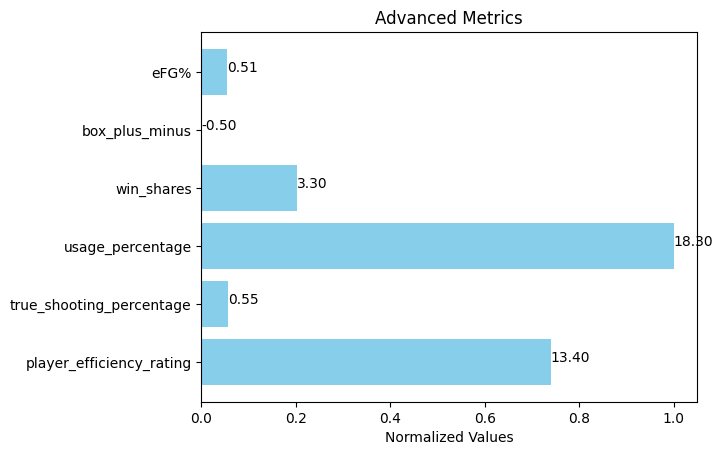

In [76]:
#using basketball reference api to find other adv metrics nba_api doesnt offer
df = pd.DataFrame(client.players_advanced_season_totals(season_end_year=2019))
rookie_year_adv_df = df.loc[df['name'] == 'Shai Gilgeous-Alexander'].copy()
#add eFG since the data didnt have it included
rookie_year_adv_df['eFG%'] = ((first_year['FGM'].iloc[0] + 0.5 * first_year['FG3M'].iloc[0]) / first_year['FGA'].iloc[0]).round(3)

def get_adv_metrics(data):
    per_game_adv_stats = {
        'player_efficiency_rating': data['player_efficiency_rating'].values[0],
        'true_shooting_percentage': data['true_shooting_percentage'].values[0],
        'usage_percentage': data['usage_percentage'].values[0],
        'win_shares': data['win_shares'].values[0],
        'box_plus_minus': data['box_plus_minus'].values[0],
        'eFG%': data['eFG%'].values[0]
    }
    return per_game_adv_stats

def get_adv_metrics_league_avgs(data):
    pass

metrics = list(get_adv_metrics(rookie_year_adv_df).keys())
values = np.array(list(get_adv_metrics(rookie_year_adv_df).values()))

# Normalizing values between 0 and 1
normalized_values = (values - values.min()) / (values.max() - values.min())

fig, ax = plt.subplots()
ax.barh(metrics, normalized_values, color='skyblue')
ax.set_xlabel('Normalized Values')
ax.set_title('Advanced Metrics')

for index, value in enumerate(values):
    ax.text(normalized_values[index], index, f'{value:.2f}')

plt.show()

In [8]:
#function that draws the basketball court

from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

Visualizing Player Shots on an NBA Court

Using the guide from [Savvas Tjortjoglou's blog](http://savvastjortjoglou.com/nba-shot-sharts.html), I was able to construct an NBA court diagram to display player shots.

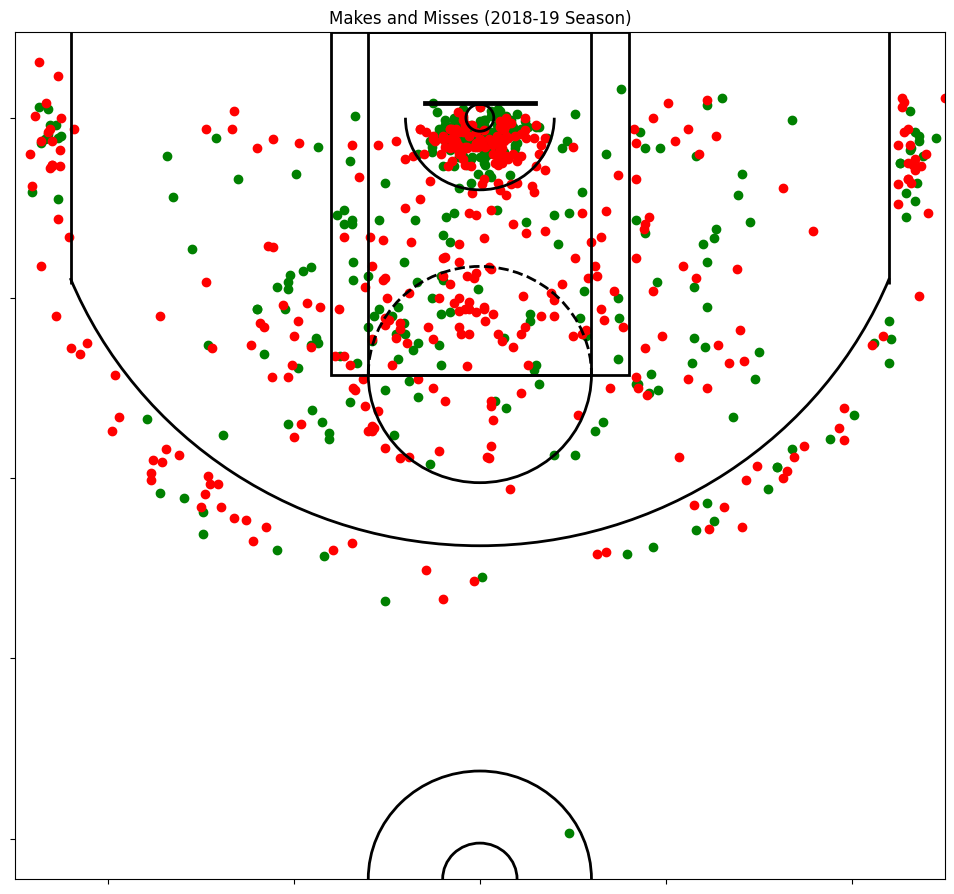

In [77]:
shot_chart_data = shotchartdetail.ShotChartDetail(
    team_id=0, 
    player_id=player_id,
    season_type_all_star='Regular Season',
    season_nullable='2018-19',
    context_measure_simple="FGA"
)
shot_chart_df = shot_chart_data.get_data_frames()[0]

#track shots made of miss
made_shots = shot_chart_df[shot_chart_df['SHOT_MADE_FLAG'] == 1]
missed_shots = shot_chart_df[shot_chart_df['SHOT_MADE_FLAG'] == 0]

plt.figure(figsize=(12,11))
plt.title('Makes and Misses (2018-19 Season)')
plt.scatter(made_shots['LOC_X'], made_shots['LOC_Y'], color='green', label='Made Shots')
plt.scatter(missed_shots['LOC_X'], missed_shots['LOC_Y'], color='red', label='Missed Shots')
draw_court()
plt.xlim(-250,250)
plt.ylim(422.5, -47.5)
plt.tick_params(labelbottom=False, labelleft=False)
plt.show()

### Shot Attempts and Outcomes (2019)
This data displays the shot attempts and outcomes (both makes and misses) from various ranges on the court.

In [10]:
range_of_shot_2019 = shot_chart_df.groupby(['SHOT_ZONE_RANGE', 'SHOT_MADE_FLAG']).size().reset_index(name='Shot Count')
range_of_shot_2019

,SHOT_ZONE_RANGE,SHOT_MADE_FLAG,Shot Count
0,16-24 ft.,0,45
1,16-24 ft.,1,35
2,24+ ft.,0,86
3,24+ ft.,1,51
4,8-16 ft.,0,115
5,8-16 ft.,1,80
6,Back Court Shot,0,1
7,Less Than 8 ft.,0,128
8,Less Than 8 ft.,1,175


### Top 5 Action Types
This data displays the types of actions Shai Gilgeous-Alexander used to score.


In [11]:
action_type = shot_chart_df.groupby(['ACTION_TYPE']).size().sort_values(ascending=False).head(5)
action_type

ACTION_TYPE
Jump Shot              170
Pullup Jump shot       166
Driving Layup Shot      97
Running Layup Shot      45
Step Back Jump shot     28
dtype: int64